In [1]:
#%% import libraries

import torch 
import torch.nn as nn
import fastai
from fastai.vision.all import *
from fastai.metrics import *
from fastai.vision.data import *
from fastai.callback import *
from pathlib import Path

fastai.__version__
"""
pip install fastai --upgrade
"""

'\npip install fastai --upgrade\n'

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


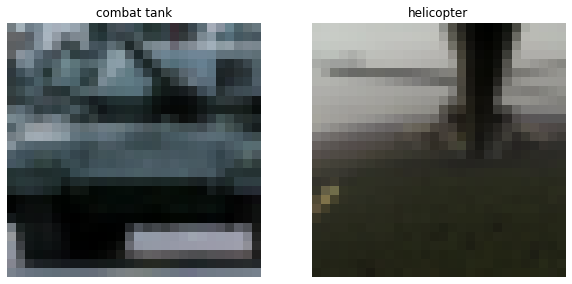

In [2]:
#%% import data

path=Path(r"C:/Users/cinar/Desktop/fastai_armed_forces")

data=ImageDataLoaders.from_folder(path,train="train",valid="valid",test="test",
                                  bs=2,item_tfms=Resize(28),shuffle=True)


data.show_batch(figsize=(10,6))


In [3]:
#%% Create Model

fastai_model=nn.Sequential(
    
    nn.Conv2d(3,4,kernel_size=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(4,8,kernel_size=(2,2)),
    nn.ReLU(),
    nn.Flatten(),
    
    #lineer katmanlar
    nn.Linear(1152,30),
    nn.ReLU(),
    nn.Linear(30,4)# 4class
    
    )

fastai_model


learn=Learner(data,fastai_model,loss_func=fastai.losses.CrossEntropyLossFlat(),
              metrics=[accuracy,error_rate])

learn.summary()


Sequential (Input shape: 2 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     2 x 4 x 27 x 27     
Conv2d                                    52         True      
ReLU                                                           
____________________________________________________________________________
                     2 x 4 x 13 x 13     
MaxPool2d                                                      
____________________________________________________________________________
                     2 x 8 x 12 x 12     
Conv2d                                    136        True      
ReLU                                                           
____________________________________________________________________________
                     2 x 1152            
Flatten                                                        
____________________________________________________________________________
                     2 x 30       

In [4]:
#%% Model Train

epoch=20
learn.fit_one_cycle(epoch)



epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.380388,1.380752,0.269231,0.730769,00:19
1,1.352419,1.325632,0.384615,0.615385,00:18
2,1.240843,1.114077,0.615385,0.384615,00:16
3,1.115258,0.969146,0.615385,0.384615,00:15
4,1.089888,0.906426,0.653846,0.346154,00:13
5,1.014876,0.908824,0.692308,0.307692,00:13
6,0.953763,0.843881,0.615385,0.384615,00:15
7,0.937051,0.816234,0.576923,0.423077,00:14
8,0.945021,0.760571,0.653846,0.346154,00:14
9,0.925637,0.732708,0.769231,0.230769,00:13


In [5]:
#%% Classic Train

epoch2=5
learn.fit(epoch2,0.001)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.788799,0.766633,0.538462,0.461538,00:12
1,0.837137,0.713301,0.615385,0.384615,00:11
2,0.745357,0.674181,0.653846,0.346154,00:11
3,0.729927,0.692421,0.692308,0.307692,00:12
4,0.734028,0.667993,0.653846,0.346154,00:11


In [6]:
#%% Model Train with Fine Tune

epoch3=5

learn.fine_tune(epoch3,freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.693479,0.663300,0.653846,0.346154,00:13
1,0.654884,0.657984,0.653846,0.346154,00:13
2,0.672800,0.722042,0.653846,0.346154,00:12
3,0.721786,0.765135,0.653846,0.346154,00:12
4,0.734080,0.798522,0.692308,0.307692,00:13


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.724376,0.741916,0.653846,0.346154,00:13
1,0.712654,0.710167,0.615385,0.384615,00:15
2,0.589055,0.664661,0.653846,0.346154,00:13
3,0.584537,0.656667,0.692308,0.307692,00:14
4,0.570813,0.657539,0.615385,0.384615,00:14
